<a href="https://colab.research.google.com/github/vladjkezor/Python-for-data-analysis/blob/hw_6/hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [761]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Подготовка данных

In [762]:
df = pd.read_csv('/content/drive/MyDrive/python_data_analysis/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [763]:
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [765]:
df.nunique()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


Имя и номер билета по моему мнению не влияет на целевую переменную, поэтому этот признак можно удалить, в признаке Embarked 2 пропуска, удалим строки с ними, в признаке Cabin много пропусков, можно заполнить их каким-нибудь значением по типу Unknown или просто удалить этот признак - думаю лучше удалить, так как не совсем понятно, как он будет коррелировать с целевой переменной(возможно с unknown что-то и получилось бы, если например побольше проанализировать влияние каюты на выживаемость или просто использовать Target encoding)

In [766]:
df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

Дальше посмотрим на распределение Age, если нормальное и нет выбросов, то заменим пропуски средним, иначе - медианой

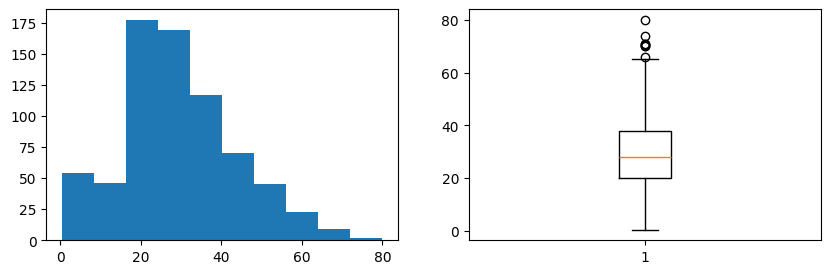

In [767]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(df['Age'].dropna())
axes[1].boxplot(df['Age'].dropna())
plt.show()

Распределение немного смещенное + присутствуют выбросы, так что заполняем медианой

In [768]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().median())


In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


признаки Embarked и sex преобразуем с помощью Label энкодера

In [770]:
cat_columns = ['Sex', 'Embarked']
encoder = LabelEncoder()
for column in cat_columns:
  df[column] = encoder.fit_transform(df[column])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


Оценим корреляцию признаков и целевой переменной

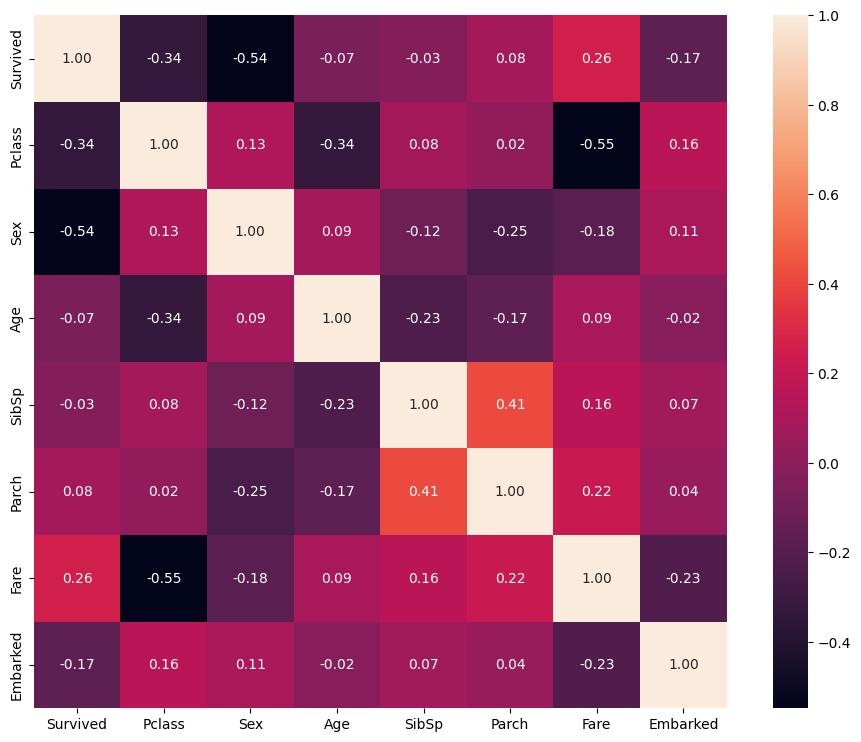

In [771]:
corrmap = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, cbar=True, square=True, annot=True, fmt='.2f')
plt.show()

В целом наблюдается заметная корреляция между классом и ценой билетов, но не критично

Также надо посмотреть распределение целевой переменной

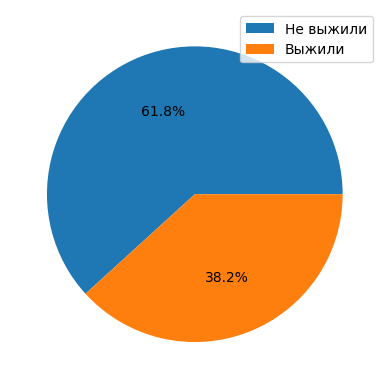

In [772]:
plt.pie(df['Survived'].value_counts(), autopct='%1.1f%%')
plt.legend(['Не выжили', 'Выжили'])
plt.show()

Целевая переменная достаточно сбалансированная

# Обучение модели

In [773]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score

In [774]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [775]:
X = df.drop(columns='Survived')
y = df['Survived']

Делим на тренировочную и тестовую части

In [776]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size=0.15, stratify=y)

Масштабируем

In [777]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Создаем и обучаем модель, которая возвращает самый частотный класс

In [778]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

Создаем и обучаем модель Логистической регрессии

In [779]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

В целом по большому счету, так как датасет является почти сбалансированным, для примерной оценки можно использовать accuracy, но конечно гораздо лучше подойдет использование f1-меры. Эта метрика учитывает как Precision, так и Recall, что помзволяет оценить, насколько хорошо модель предсказывает оба класса, а не только один из них.

In [780]:
y_pred_dummy = dummy_clf.predict(X_test)
y_pred_logreg = log_reg.predict(X_test)

In [781]:
print(dummy_clf, 'accuracy = ', accuracy_score(y_test, y_pred_dummy))
print(log_reg, 'accuracy = ', accuracy_score(y_test, y_pred_logreg))

DummyClassifier(strategy='most_frequent') accuracy =  0.6194029850746269
LogisticRegression() accuracy =  0.7985074626865671


In [782]:
print(dummy_clf, 'f1-score = ', f1_score(y_test, y_pred_dummy))
print(log_reg, 'f1-score = ', f1_score(y_test, y_pred_logreg))

DummyClassifier(strategy='most_frequent') f1-score =  0.0
LogisticRegression() f1-score =  0.7378640776699029


Метрики показывают не особо высокие показатели, возмонжо стоило попробовать создать новые признаки, подобрать гиперпараметры или попробовать другую модель.